In [1]:
import jar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [25]:
with open('100pagesWPUB.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [31]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 108 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 10019 non-null  object 
 1   rank                 10019 non-null  float64
 2   desc                 10019 non-null  object 
 3   geek                 10019 non-null  float64
 4   rating               10019 non-null  float64
 5   num_voters           10019 non-null  int64  
 6   price                10019 non-null  object 
 7   average              10019 non-null  object 
 8   avgweight            10019 non-null  object 
 9   baverage             10019 non-null  float64
 10  maxplayers           10018 non-null  float64
 11  maxplaytime          10018 non-null  float64
 12  minage               10018 non-null  float64
 13  minplayers           10018 non-null  float64
 14  minplaytime          10018 non-null  float64
 15  numcomments          10019 non-null

#### Warning
The following looks only at places where `df.price_mkt` is not null, leaving about 3300/10,000

In [75]:
df_price = df.copy()
df_price.loc[df['price_mkt'].isnull(), 'price_mkt'] = df['walmart_price']
df_price= df[df['price_mkt'].notna()]
df_price = df_price[df_price.price_mkt < 150]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 10016
Columns: 108 entries, link to numpub
dtypes: float64(89), int64(8), object(11)
memory usage: 2.7+ MB


In [122]:
smaller_price = df_price[['rating', 'price_mkt','avgweight','strategy_war', 'family', 'abstract', 'rating_des', 'rating_pub']]

In [128]:
smaller_price['diff_des'] = smaller_price['rating'] - smaller_price['rating_des']
smaller_price['diff_pub'] = smaller_price['rating'] - smaller_price['rating_pub']
smaller_price.head()

<ipython-input-128-726679e6aacb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_price['diff_des'] = smaller_price['rating'] - smaller_price['rating_des']
<ipython-input-128-726679e6aacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_price['diff_pub'] = smaller_price['rating'] - smaller_price['rating_pub']


,rating,price_mkt,avgweight,strategy_war,family,abstract,rating_des,rating_pub,diff_des,diff_pub
1,7.20,16.110,2.08,1,0,0,6.905455,6.553636,0.294545,0.646364
3,6.98,69.795,2.75,1,0,0,6.935000,6.553636,0.045000,0.426364
5,6.11,12.000,2.1429,0,0,0,6.885333,6.553636,-0.775333,-0.443636
8,6.58,10.000,2.3556,1,0,1,6.460000,6.553636,0.120000,0.026364
11,7.23,71.210,1.7879,0,1,0,6.905455,6.655063,0.324545,0.574937


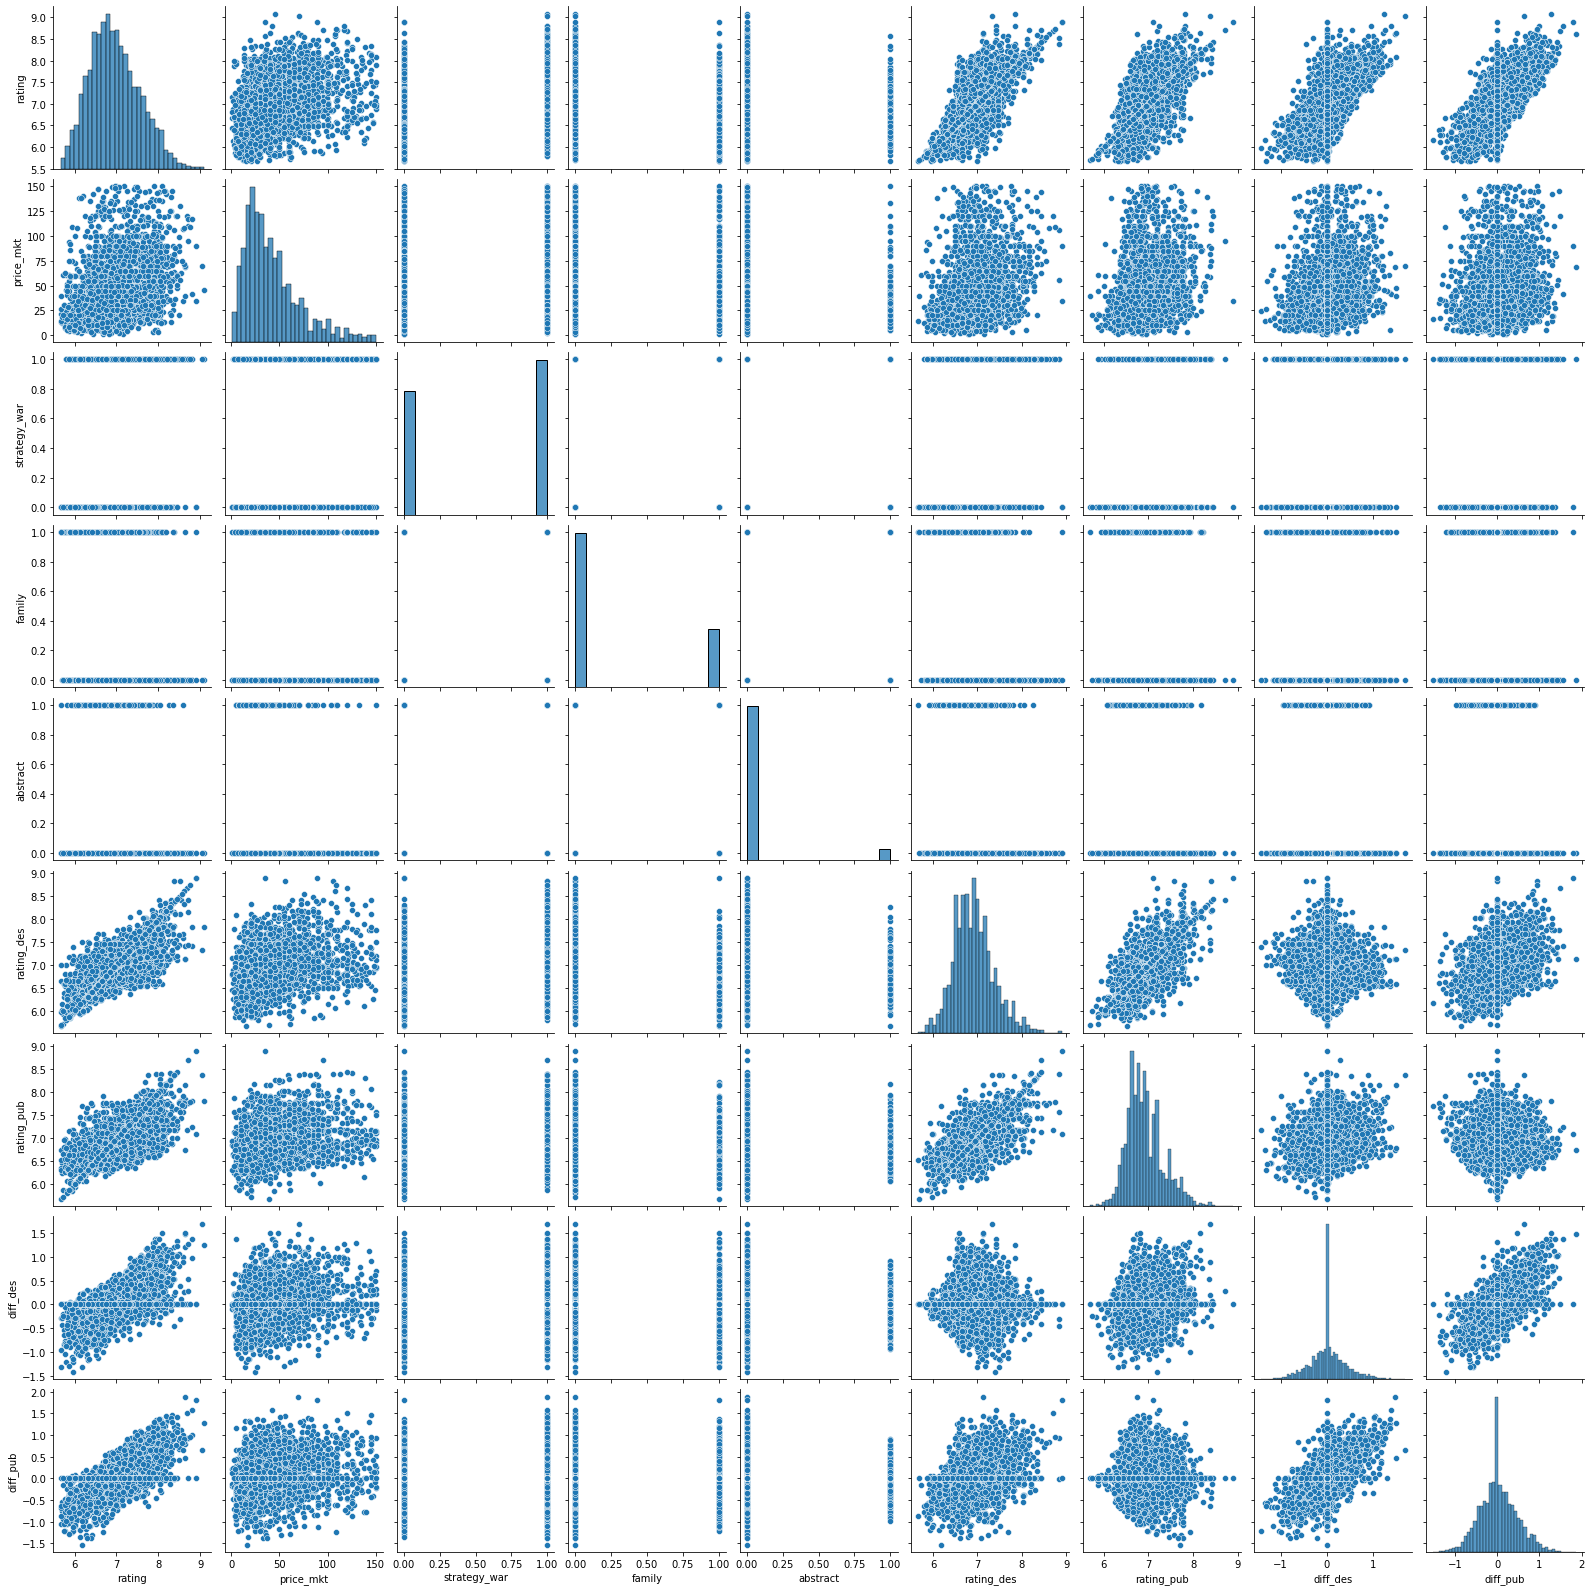

In [129]:
sns.pairplot(smaller_price)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_des', ylabel='Density'>

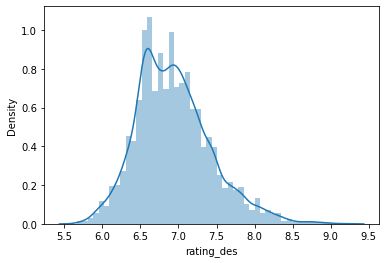

In [162]:
sns.distplot(df['rating_des'])

In [170]:
df[df.rating_des == df.rating_des.min()].designer

3721           Roy Parsons
6669    William Stephenson
Name: designer, dtype: object

In [176]:
df[df.price_mkt == df.price_mkt.median()]

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,price_mkt_pub,views_pub,strategy_war_pub,strategy_pub,family_pub,thematic_pub,war_pub,party_pub,abstract_pub,numpub
1679,/boardgame/15510/tower-babel,1727.0,Tower of Babel\n(2005),6.175,6.62,2258,/boardgame/15510/tower-babel/marketplace/geekm...,6.62499,2.3344,6.17461,...,44.814722,399965.492754,0.608696,0.536232,0.478261,0.000000,0.072464,0.014493,0.072464,69.0
3554,/boardgame/29382/rock-marne,7205.0,Rock of the Marne\n(2008),5.592,6.69,134,/boardgame/29382/rock-marne/marketplace/geekma...,6.69478,2.4348,5.59227,...,93.682500,93828.515625,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,64.0
3607,/boardgame/21920/leonardo-da-vinci,1264.0,Leonardo da Vinci\n(2006),6.358,6.76,3354,/boardgame/21920/leonardo-da-vinci/marketplace...,6.76061,3.1864,6.35799,...,19.252917,143788.551724,0.517241,0.310345,0.206897,0.172414,0.241379,0.206897,0.000000,29.0
4345,/boardgame/121409/1969,5131.0,1969\n(2012),5.669,6.36,406,/boardgame/121409/1969/marketplace/geekmarket,6.35611,2.2941,5.66871,...,36.000000,74364.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,2.0
5070,/boardgame/164812/roll-it-deluxe-edition,2092.0,Roll For It! Deluxe Edition\n(2014),6.062,6.63,1794,/boardgame/164812/roll-it-deluxe-edition/marke...,6.62909,1.0984,6.06210,...,27.228750,110305.076923,0.230769,0.153846,0.461538,0.076923,0.153846,0.076923,0.230769,13.0
8025,/boardgame/64/joan-arc,5269.0,Joan of Arc\n(1998),5.662,6.28,434,/boardgame/64/joan-arc/marketplace/geekmarket,6.27767,2.5424,5.66230,...,69.683750,62262.361702,1.000000,0.021277,0.000000,0.021277,1.000000,0.000000,0.000000,47.0
8499,/boardgame/178944/battalia-creation,2416.0,BATTALIA: The Creation\n(2015),5.988,7.44,805,/boardgame/178944/battalia-creation/marketplac...,7.4427,3.4857,5.98804,...,36.000000,129081.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
9519,/boardgame/175023/crows-overkill,6520.0,Crows Overkill\n(2014)\n\n\n\t\t\tKill birds t...,5.611,6.42,223,/boardgame/175023/crows-overkill/marketplace/g...,6.41614,1.1429,5.61080,...,36.000000,32475.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [117]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [244]:
lr = LinearRegression()

X = df_price[['avgweight','rating', 'views', 'numfans']]

y = df_price['price_mkt']
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.2396838908840354,
 array([ 1.20273727e+01,  9.41187036e+00,  1.56411423e-05, -1.24749917e-02]))

In [245]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.2575506035095776

In [246]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [247]:
X_train.shape, X_test.shape

((1916, 4), (639, 4))

In [248]:
lasso_model = Lasso(alpha = 1) 
lasso_model.fit(X_train, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('avgweight', 10.566260986785231),
 ('rating', 6.924836373587459),
 ('views', 1.692388896553595e-05),
 ('numfans', -0.012187384515648483)]

In [249]:
lasso_model.coef_

array([ 1.05662610e+01,  6.92483637e+00,  1.69238890e-05, -1.21873845e-02])

In [250]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('avgweight', 11.235136910087283),
 ('rating', 9.645693238676934),
 ('views', 1.597444689283467e-05),
 ('numfans', -0.012481766673890556)]

In [251]:
test_set_pred = lr_model_ridge.predict(X_test)

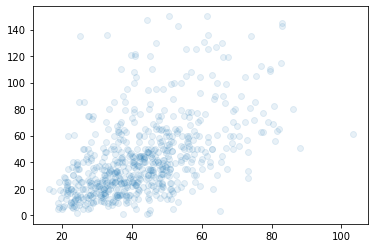

In [252]:
plt.scatter(test_set_pred, y_test, alpha=.1)

In [253]:
r2_score(y_test, test_set_pred)

0.2621500369605121

In [98]:
lr.predict([3,1])

ValueError: Expected 2D array, got 1D array instead:
array=[3 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: x and y must be the same size

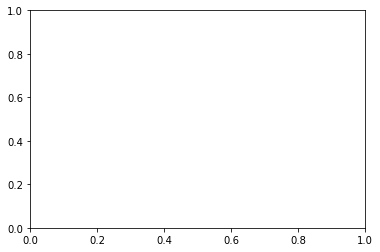

In [91]:
plt.scatter(X, y,color='g')
plt.plot(X, lr.predict(X),color='k')